In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import RobustScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [42]:
#pip install delayed
#!pip install lightgbm

# Data Exploration:

1. In this section I have performed descriptive analysis. Understood the variables and their corresponding values. On the columns Glucose,BloodPressure,SkinThickness,Insulin,BMI a value of zero does not make sense and thus indicates missing value.
2. Visually explored these variables using histograms and treated the missing values accordingly.
3. There are integer and float data type variables in this dataset. Created a count (frequency) plot describing the data types and the count of variables. 

In [3]:
df = pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course6-Capstone/Project 2 - HealthCare/Healthcare - Diabetes/health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
# Descriptive Analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Insights from Descriptive Analysis

There are 768 observations of 9 variable. Independent variables are Pregnencies , Glucose, BloodPressure, Insulin, BMI, DiabetesPedigree Function and Age. Outcome is dependent Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. values of other independent variables are Preg = 3.845052,Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578 DPF = 0.471876 .

Outcome=0 is non-diabetic patient and Outcome=1 is diabetic patient.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are Integer and Float data type variables in this dataset. Created a count(Frequency) plot describing the data types and the count of variables.

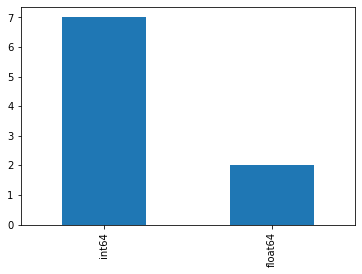

In [7]:
(df.dtypes).value_counts().plot(kind = 'bar')
plt.show()

Below I have checked the balance of the data by plotting the count of outcomes by their value.

# Data Exploration:

1. In this section I have checked the balance of the data by plotting the count of outcomes by their value and described the findings.
2. I have created scatter charts between the pair of variables to understand the relationships and described the findings. 
3. Performed correlation analysis. Visually explored it using a heat map.

In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

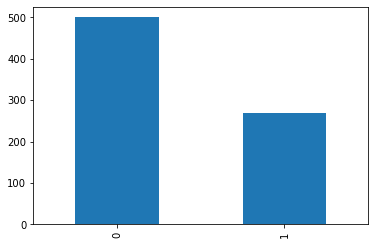

In [9]:
(df.Outcome).value_counts().plot(kind = 'bar')
plt.show()

This is a slightly imbalanced dataset with majority "Non diabetic Class". I have created a balanced dataset using sampling Techniques

In [10]:
df1 = df.drop('Outcome', axis=1)

Text(1, 2, 'Analysing distribution of data')

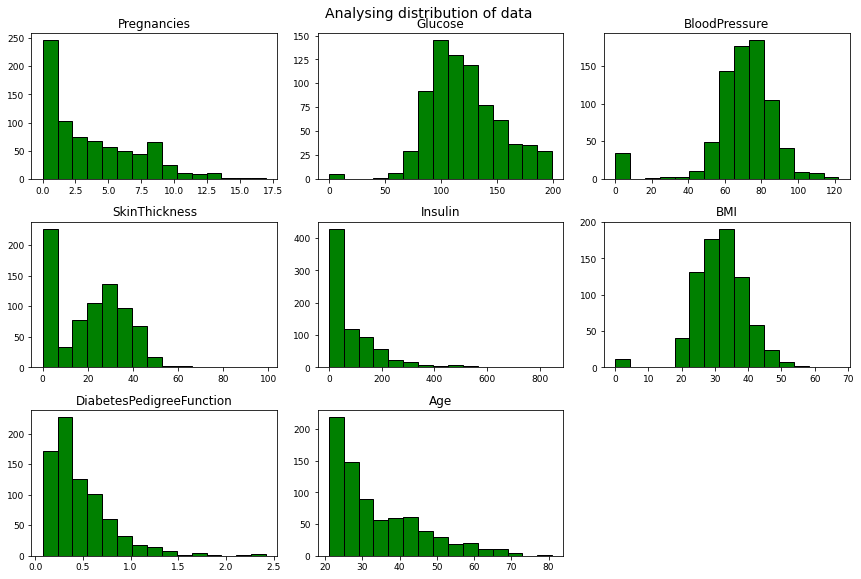

In [11]:
# Univariate Analysis
df1.hist(bins=15, 
             color='green', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot

plt.suptitle('Analysing distribution of data',
             x=1, # title x position
             y=2, # title y position
             fontsize=14)

Here BMI, Blood Pressure, glucose,Skin Thicknessthe are almost Normally or Gaussian Distribution.
Here the Age, Insulin, Pregnancies, DiabetesPedigreeFunction data is right skewed.
Some datas are loaded majorly on 0.

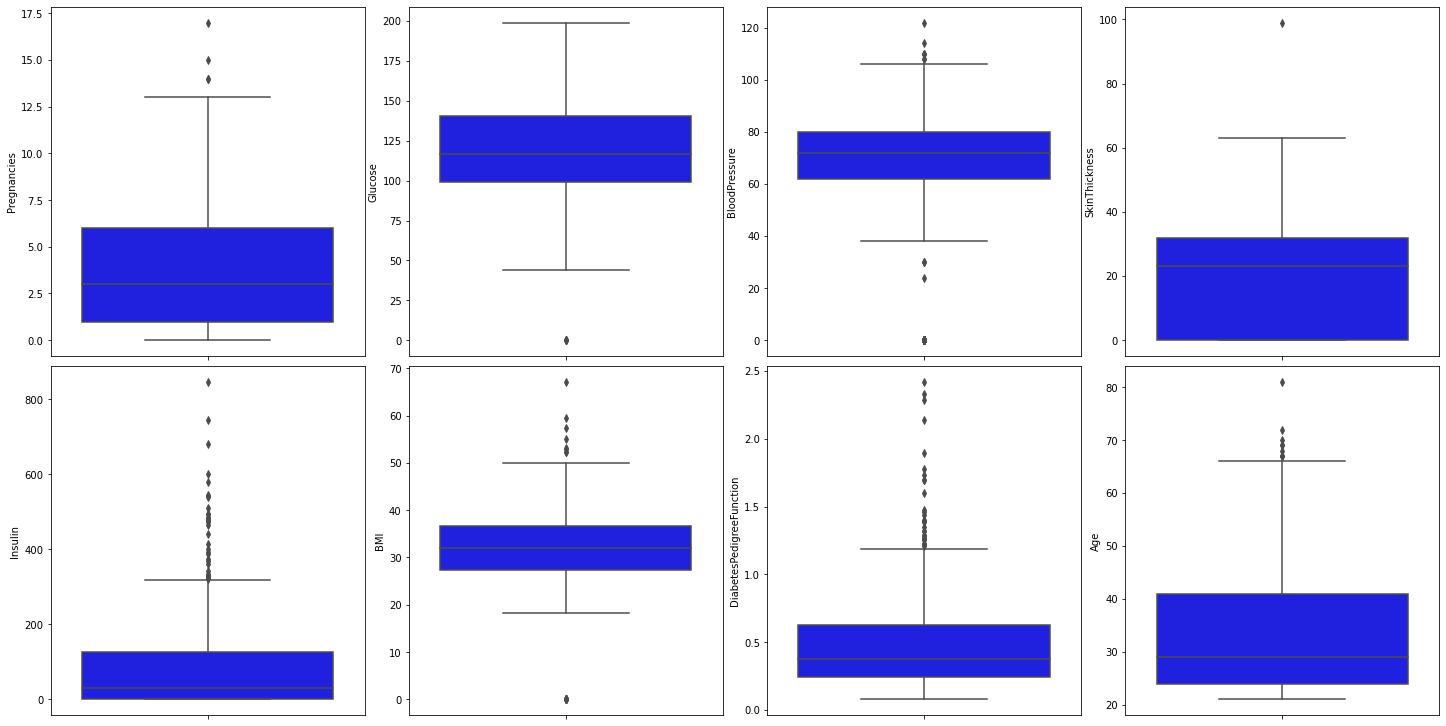

In [12]:
fig , ax = plt.subplots(nrows= 2,       # no,of plots comes in row wise 
                        ncols= 4,       # no,of plots comes in column wise 
                        figsize=(20,10) # size of plot
                        )
ax = ax.flatten() # It returns a flattened version of the array, to avoid numpy.ndarray
index = 0
for i in df1.columns:
  sns.boxplot(y=i,data = df1, ax=ax[index],color='blue')
  index += 1
plt.tight_layout(pad=0.4)

In Box plot, it completely shows the picture of the Outlier present in the datasets.
All the series of data column has outlier, since the shape of the data (768, 9), it shows that datasets is very small and the outliers cannot be removed.
But it should be scaled using Robust scaler because it consists of many outlier where Standard Scaler, Min max Scaler etc are sensitive to outliers

<AxesSubplot:>

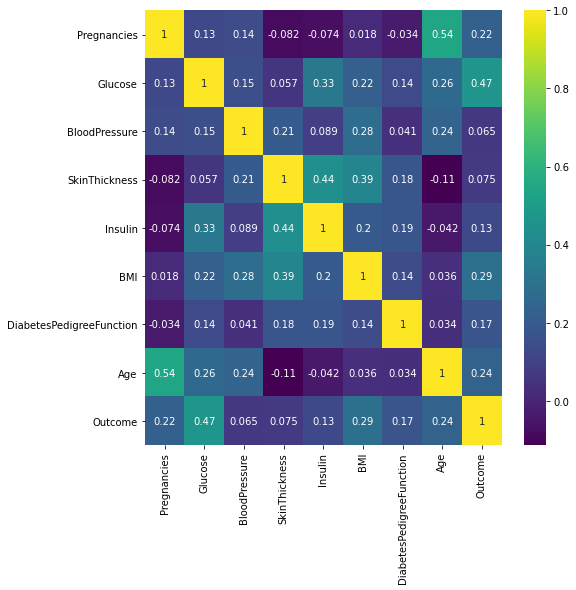

In [13]:
# Multivariate Analysis
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')  ### gives correlation value

From the HeatMap, we can see that Majority of the correlations are "Positive", but weak. Strongest correlated pairs are
"BMI and Skin Thickness", "Age and Pregnancies", "Glucose and Outcome(Target Variable)",
"Insulin and Glucose","Insulin and SkinThickness.

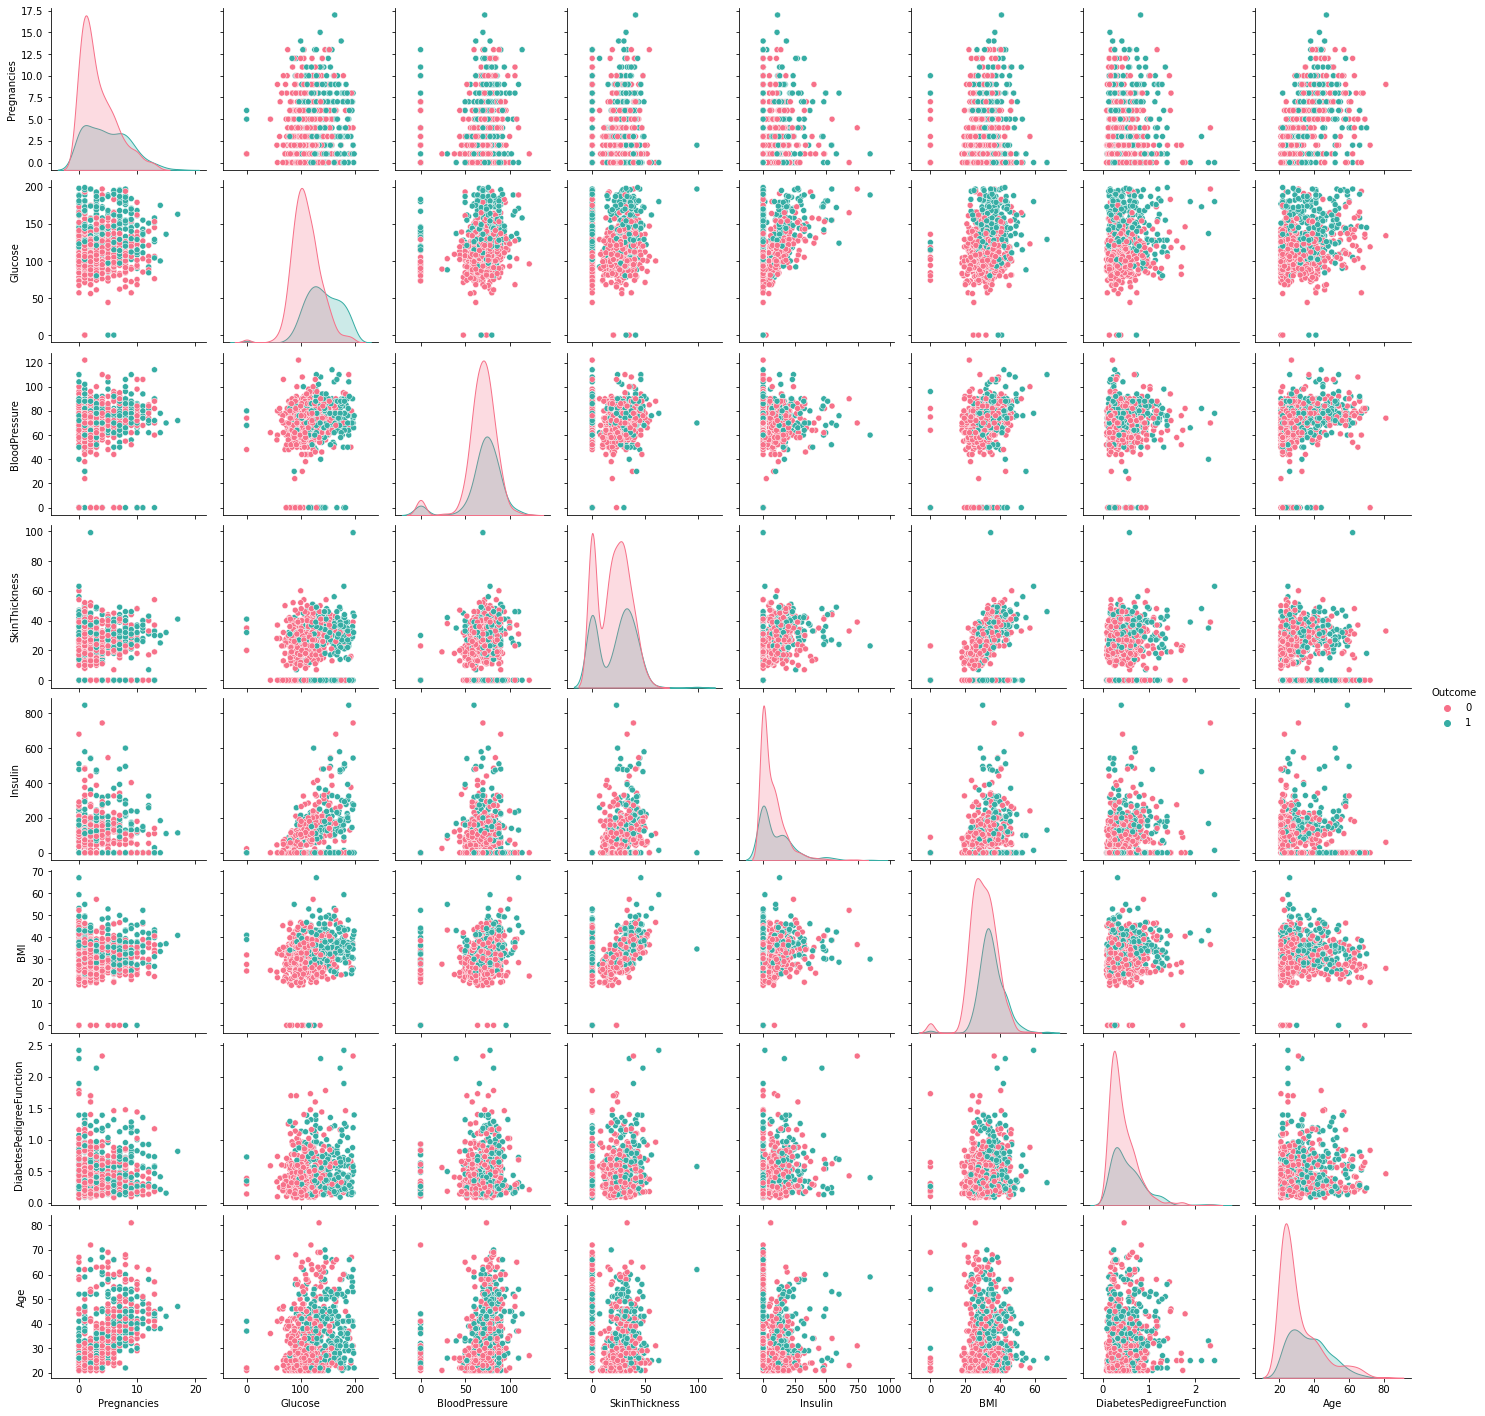

In [14]:
sns.pairplot(df,              # dataset
             hue='Outcome',   # variable in dataset to map plot aspects to different color
             palette='husl',
             )

This pairsplot shows the extent and direction of correlation between variables as well as the spread of the data for each pair, distinguishing them by the "Outcome"

Above plot shows the distribution of dataset in scatter plot and Kernel Density Estimator, for the different combination of datasets with respect to the Outcome.

Here In this Kernel Density Estimate plot, the data of Glucose for Outcome_0 is distributed like a Normal/Gaussian distribution, with sharp peakness and most of the data points accumalted nearby the mean.
But the curve looks abnormal because of the Outcome_1, here the datas are accumulated in a wide pattern with some outliers at the bottom.

Here in the above 2 curves of Pregancies, In Outcome_0 (Green curve), the Pregnancies distribution is look like right skewed, with sharp peakness.
In Outcome_1 (Red curve), the Pregnancies distribution is look like abnormal distribution, data is distributed widely. The right tail extended widely at end.

Here in above kDE plot of BloodPressure, for the both the Outcome 1 & 0, except that small abnormality near zero, the rest of the data is completely shows that it is normal distributed.

In SkinThickness both the curve the mode is equal to 0.
The tail part of Outcome = 0, is extended quite alot. The presence of outlier will disturb the classfication while building the model i.e it will result in poor classification or overfitting.

Insulin KDE plot for both the Outcome is completely right skewed. The data distribtion of Outcome_1 is like so wavy and the right tail is extended & shows the plots of outliers.

In BMI, there is some accumulation of data on left side of both the curve. But the Outcome_1 is a normal distribution and it tell BMI plays one important role in Diabetes. 

In diabeticPedigreeFuncion curve, it shows the picture of both the outcomes were right skewed. Outcome 1, the data distribution is wide so there is abnormal in shape of Density for Outcome_1.

KDE plot for Age, outcome_0 is right skewed, after the age of 40 (approx) the distribution pattern is abnormal towards the right tail.
KDE plot for Age, outcome_1 the data is speard across between 25-60 yrs.



This tells that the data needs to be scaled properly, by considering its outlier as well.

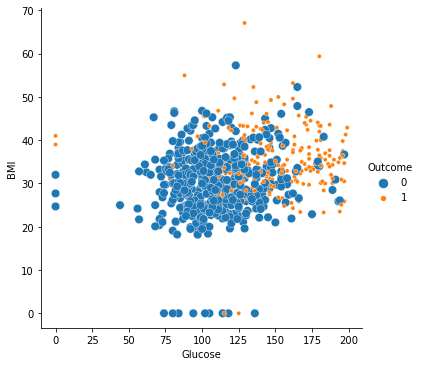

In [15]:
sns.relplot(x='Glucose',
            y='BMI',
            data = df,
            hue = 'Outcome',
            size='Outcome')

The above scatter plot tells, the people who have abnormal BMI and higher the Glucose level, will have higher the chance of getting Diabetic(orange small dots)

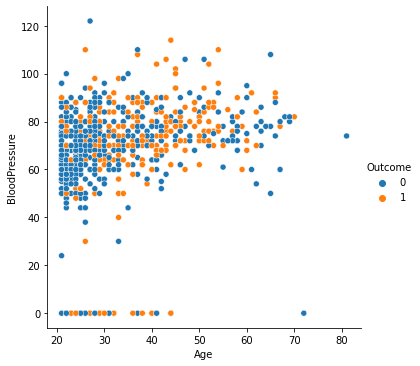

In [16]:
sns.relplot(x='Age',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',)
            #size='Outcome')

Here the above plot shows that, higher the chance for people have High BloodPressure and getting Aged to be a Diabetic.

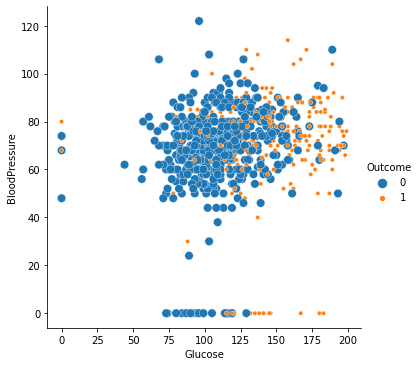

In [17]:
sns.relplot(x='Glucose',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',
            size='Outcome')

Here the above plot shows that, higher the chance for people have High BloodPressure and Glucose to be a Diabetic.

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values in the data. But we will have to handle the outliers. 

As data contains outliers I will use the median because otherwise the value of the mean would be dominated by the outliers rather than the typical values

In [19]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].median())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].median())

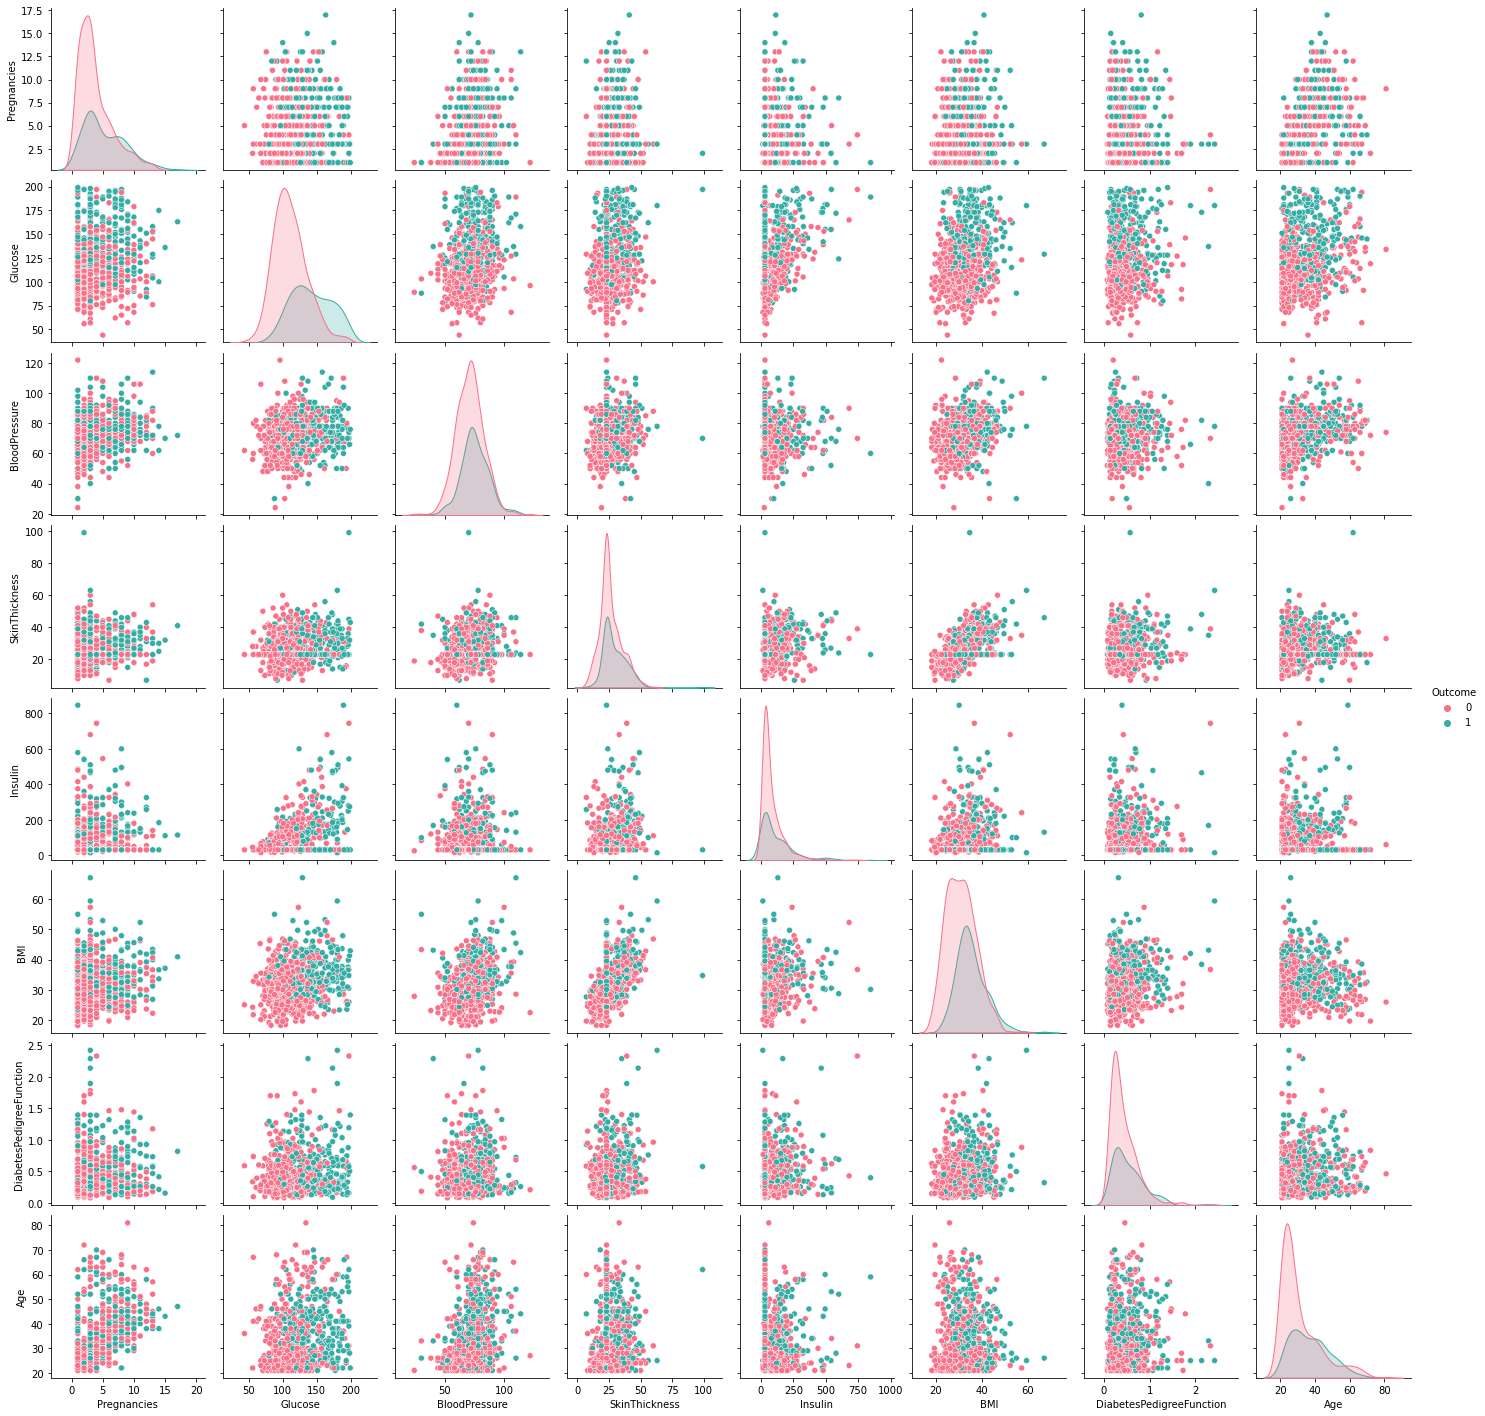

In [20]:
sns.pairplot(df,              # dataset
             hue='Outcome',   # variable in dataset to map plot aspects to different color
             palette='husl',
             )

Even after replacing the 0 with median values based on their respective class, still Insulin,BMI,SkinThicknes,BloodPressure,Pregnacies,DiabetesPedigreeFunction looks right skewed.But Glucose looks normally distributed.

<AxesSubplot:>

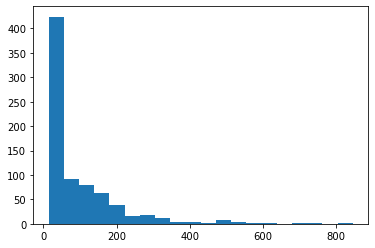

In [21]:
df.Insulin.hist(bins=20,grid=False)

<AxesSubplot:xlabel='Insulin'>

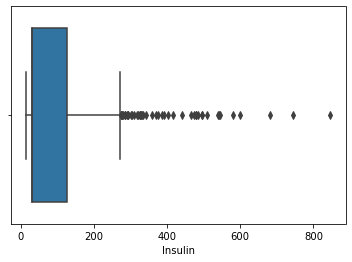

In [22]:
sns.boxplot(x=df.Insulin)

<AxesSubplot:>

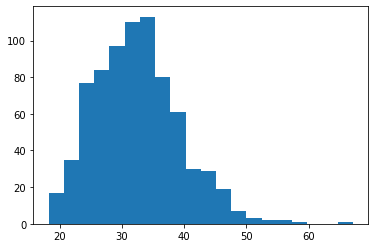

In [23]:
df.BMI.hist(bins=20,grid=False)

<AxesSubplot:xlabel='BMI'>

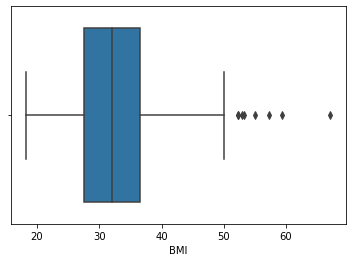

In [24]:
sns.boxplot(x=df.BMI)

<AxesSubplot:>

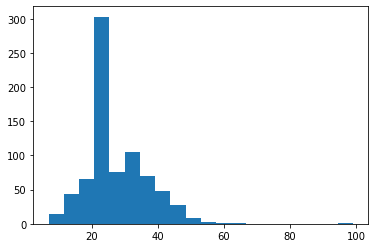

In [25]:
df.SkinThickness.hist(bins=20,grid=False)

<AxesSubplot:xlabel='SkinThickness'>

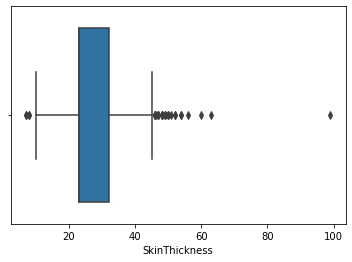

In [26]:
sns.boxplot(x=df.SkinThickness)

<AxesSubplot:>

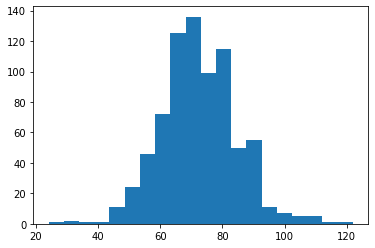

In [27]:
df.BloodPressure.hist(bins=20,grid=False)

<AxesSubplot:xlabel='BloodPressure'>

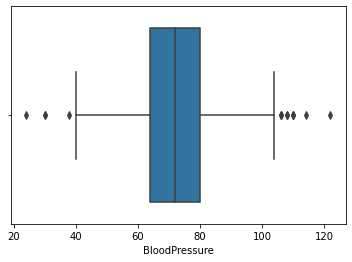

In [28]:
sns.boxplot(x=df.BloodPressure)

<AxesSubplot:>

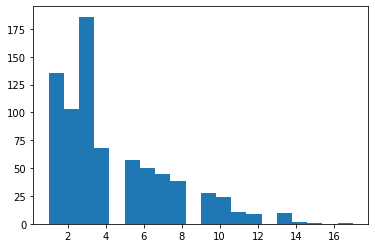

In [29]:
df.Pregnancies.hist(bins=20,grid=False)

<AxesSubplot:xlabel='Pregnancies'>

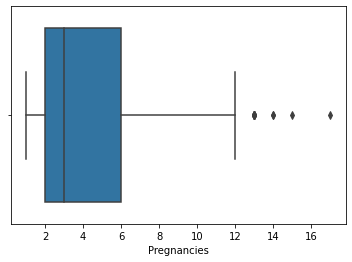

In [30]:
sns.boxplot(x=df.Pregnancies)

<AxesSubplot:>

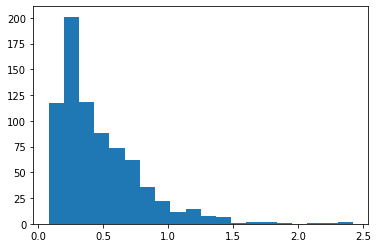

In [31]:
df.DiabetesPedigreeFunction.hist(bins=20,grid=False)

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

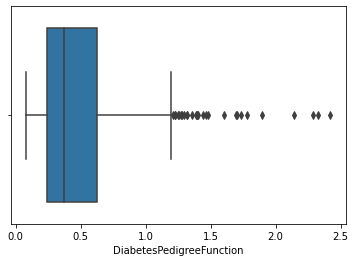

In [32]:
sns.boxplot(x=df.DiabetesPedigreeFunction)

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. 
MinMaxScaler is a good place to start unless you know you want your feature to have a normal distribution or want outliers to have reduced influence.
Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.
Since Insulin,BMI,SkinThicknes,BloodPressure,Pregnacies,DiabetesPedigreeFunction has more outlier, so I will use Robust scaler.

In [33]:
rs = RobustScaler(with_centering=True, 
                  with_scaling=True, 
                  quantile_range=(25.0, 75.0), 
                  copy=True)

In [34]:
df['Insulin'] = rs.fit_transform(df['Insulin'].values.reshape(-1,1))
df['SkinThickness'] = rs.fit_transform(df['SkinThickness'].values.reshape(-1,1))
df['BloodPressure'] = rs.fit_transform(df['BloodPressure'].values.reshape(-1,1))
df['DiabetesPedigreeFunction'] = rs.fit_transform(df['DiabetesPedigreeFunction'].values.reshape(-1,1))
df['Glucose'] = rs.fit_transform(df['Glucose'].values.reshape(-1,1))
df['Pregnancies'] = rs.fit_transform(df['Pregnancies'].values.reshape(-1,1))

To handle the outliers in Age and BMI column, I will create bins of age and BMI column

In [35]:
df['BinsForAge']=pd.cut(x = df['Age'],                                      # Cloumn to be binned 
                        bins = [20,30,50,90],                           # Binnning sizes
                        labels = ['young','middle','old'] # class name for Binning
                    )

# Encoding the categorical Age column
df.BinsForAge = df.BinsForAge.replace(to_replace = ['young','middle','old'],value =[0,1,2],inplace=False)

In [36]:
df['BinsForBMI']=pd.cut(x = df['BMI'],
                        bins = [18,25,30,80], 
                        labels = ['Normal','Overweight','Obese'])

df.BinsForBMI = df.BinsForBMI.replace(to_replace = ['Normal','Overweight','Obese'],value =[0,1,2],inplace=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BinsForAge,BinsForBMI
0,0.75,0.765432,0.000,1.333333,-0.007752,33.6,0.665359,50,1,1,2
1,-0.50,-0.790123,-0.375,0.666667,-0.007752,26.6,-0.056209,31,0,1,1
2,1.25,1.629630,-0.500,0.000000,-0.007752,23.3,0.783007,32,1,1,0
3,-0.50,-0.691358,-0.375,0.000000,0.648579,28.1,-0.537255,21,0,0,1
4,0.00,0.493827,-2.000,1.333333,1.413437,43.1,5.007843,33,1,1,2


In [37]:
df = df.drop('Age',axis=1)
df = df.drop('BMI',axis=1)

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,BinsForAge,BinsForBMI
0,0.75,0.765432,0.000,1.333333,-0.007752,0.665359,1,1,2
1,-0.50,-0.790123,-0.375,0.666667,-0.007752,-0.056209,0,1,1
2,1.25,1.629630,-0.500,0.000000,-0.007752,0.783007,1,1,0
3,-0.50,-0.691358,-0.375,0.000000,0.648579,-0.537255,0,0,1
4,0.00,0.493827,-2.000,1.333333,1.413437,5.007843,1,1,2


# Data Modeling:

1. In this section, I have devised strategies for model building. 
2. Applied an appropriate classification algorithm to build a model. Compared various models with the results from KNN algorithm.
3. Created a classification report by analyzing sensitivity, specificity, AUC (ROC curve).

I have used an oversampling technique called Synthetic Minority Over-Sampling Technique or SMOTE to balance out our dataset.
SMOTE is an oversampling algorithm that relies on the concept of nearest neighbors to create its synthetic data.

In [39]:
# k=1/8/2 # # SMOTE number of neighbors
#sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
#X_res, y_res = sm.fit_resample(X, y)

sm = SMOTE(sampling_strategy='auto', random_state=9,n_jobs=-1)
x = df.drop(['Outcome'],axis = 1)
y = df.Outcome
#x, y = sm.fit_resample(x,y)

columns = x.columns

In [40]:
x,y=sm.fit_resample(x, y)
x = pd.DataFrame(data=x,columns=columns )
y= pd.DataFrame(data=y,columns=['Outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x))
print("Number of NEGATIVE in oversampled data",len(y[y['Outcome']==0]))
print("Number of POSITIVE",len(y[y['Outcome']==1]))
print("Proportion of NEGATIVE data in oversampled data is ",len(y[y['Outcome']==0])/len(x))
print("Proportion of POSITIVE data in oversampled data is ",len(y[y['Outcome']==1])/len(x))

length of oversampled data is  1000
Number of NEGATIVE in oversampled data 500
Number of POSITIVE 500
Proportion of NEGATIVE data in oversampled data is  0.5
Proportion of POSITIVE data in oversampled data is  0.5


In [41]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (800, 8)
Shape of y_train (800, 1)
Shape of x_test (200, 8)
Shape of y_test (200, 1)


As observations are balanced now, a diagnostic tool that will help me in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling is ROC Curves. ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.
It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make.

False Positive: Predict an event when there was no event.Also known as "TYPE 1 error".
False Negative: Predict no event when in fact there was an event. Also known as "TYPE 2 error".
By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

true positive rate=It describes how good the model is at predicting the positive class when the actual outcome is positive.
The true positive rate is also referred to as sensitivity.
True Positive Rate = True Positives / (True Positives + False Negatives)=sensitivity

false positive rate=also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative. False Positive Rate = False Positives / (False Positives + True Negatives)
The false positive rate is also referred to as the inverted specificity .
Specificity = True Negatives / (True Negatives + False Positives)
False Positive Rate = 1 - Specificity.

I have started with Logistic Regression classification algorithm.

# Logistic Regression with oversampling

In [42]:
lgr = LogisticRegression(random_state=100,
                        n_jobs=-1,
                        penalty='l2',
                        solver='liblinear'
                       )
lgr.fit(x_train, y_train)
y_pred_lgr = lgr.predict(x_test)

print('test accuracy : ', accuracy_score(y_pred_lgr,y_test))
print('train accuracy : ',lgr.score(x_train,y_train))

test accuracy :  0.705
train accuracy :  0.76625


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sharv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lgr.predict(x_test))
cm

array([[70, 30],
       [29, 71]], dtype=int64)

In [44]:
def sens_spec(cm):

    total_cm = sum(sum(cm))

    accuracy_clf = (cm[0,0] + cm[1,1]) / total_cm

    sensitivity_clf = cm[0,0] / (cm[0, 0] + cm[0, 1])

    specificity_clf = cm[1,1] / (cm[1, 0] + cm[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

print(sens_spec(cm))

('Accuracy: 0.7', 'Sensitivity: 0.7', 'Specificity: 0.71')


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lgr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       100
           1       0.70      0.71      0.71       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



AUC: 0.791
True Positive Rate - [0.   0.   0.   0.04 0.04 0.21 0.21 0.26 0.26 0.34 0.34 0.36 0.36 0.39
 0.39 0.41 0.41 0.45 0.45 0.47 0.47 0.48 0.48 0.51 0.51 0.52 0.52 0.53
 0.53 0.58 0.58 0.64 0.64 0.65 0.65 0.68 0.68 0.71 0.71 0.72 0.72 0.75
 0.75 0.78 0.78 0.81 0.81 0.83 0.83 0.84 0.84 0.85 0.85 0.87 0.87 0.89
 0.89 0.91 0.91 0.95 0.95 0.96 0.96 0.97 0.97 0.98 0.98 0.99 0.99 1.
 1.  ], False Positive Rate - [0.   0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.07 0.07 0.08 0.08
 0.09 0.09 0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.14 0.15 0.15 0.18 0.18
 0.19 0.19 0.2  0.2  0.21 0.21 0.22 0.22 0.24 0.24 0.32 0.32 0.37 0.37
 0.41 0.41 0.43 0.43 0.44 0.44 0.45 0.45 0.46 0.46 0.49 0.49 0.5  0.5
 0.52 0.52 0.53 0.53 0.54 0.54 0.55 0.55 0.6  0.6  0.65 0.65 0.66 0.66
 1.  ] Thresholds - [1.98714567 0.98714567 0.98456119 0.97457885 0.97127209 0.90620431
 0.90473482 0.88533445 0.88519135 0.82571313 0.8057116  0.80282697
 0.80129459 0.7921639  0.78564479 0.76396427 0.75664561 0.74919774
 0.7491931

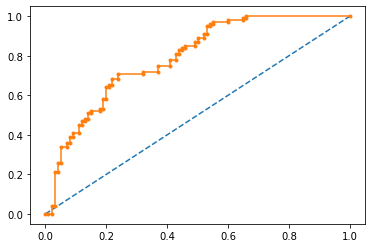

In [46]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)

# predict probabilities
probs = lgr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--',label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# Decision Tree Classifier with oversampling

In [47]:
#dtc = DecisionTreeClassifier(criterion="entropy",  # For the information gain
#                               splitter="best",    # For the best split 
#                               random_state=9
#                            )
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

print('test accuracy : ', accuracy_score(y_pred_dtc,y_test))
print('train accuracy:',dtc.score(x_train,y_train))

test accuracy :  0.745
train accuracy: 0.82625


In [48]:
cm1 = confusion_matrix(y_test,dtc.predict(x_test))
cm1

array([[63, 37],
       [14, 86]], dtype=int64)

In [49]:
def sens_spec(cm1):

    total_cm = sum(sum(cm1))

    accuracy_clf = (cm1[0,0] + cm1[1,1]) / total_cm

    sensitivity_clf = cm1[0,0] / (cm1[0, 0] + cm1[0, 1])

    specificity_clf = cm1[1,1] / (cm1[1, 0] + cm1[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

print(sens_spec(cm1))

('Accuracy: 0.74', 'Sensitivity: 0.63', 'Specificity: 0.86')



 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       100
           1       0.70      0.86      0.77       100

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200
 


 ROC Curve
True Positive Rate - [0.   0.01 0.11 0.25 0.37 0.41 0.44 0.47 0.71 0.72 0.74 0.74 0.77 0.86
 0.86 0.89 0.93 0.95 0.95 0.95 0.97 1.  ], False Positive Rate - [0.   0.   0.01 0.06 0.08 0.1  0.1  0.11 0.22 0.23 0.23 0.26 0.27 0.37
 0.38 0.43 0.49 0.5  0.53 0.55 0.81 1.  ] Thresholds - [2.         1.         0.97959184 0.89156627 0.88571429 0.86206897
 0.81818182 0.78571429 0.7745098  0.71428571 0.7        0.66666667
 0.57142857 0.56122449 0.5        0.36       0.33333333 0.27272727
 0.25       0.05882353 0.02721088 0.        ]


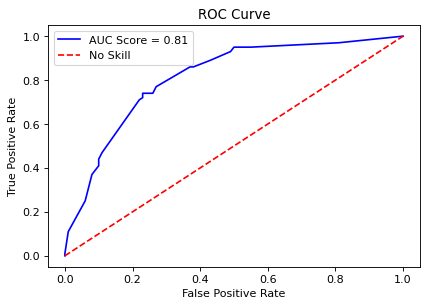

In [50]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred_dtc),'\n')
print("\n","ROC Curve")
dtc_prob=dtc.predict_proba(x_test)
dtc_prob1=dtc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,dtc_prob1)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresh))
roc_auc_dtc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_dtc)
plt.plot(fpr,fpr,'r--',color='red',label='No Skill')
plt.legend()

# Random Forest Classifier with oversampling

In [51]:
#rfc = RandomForestClassifier(max_depth=2, 
#                             random_state=0,
#                             n_jobs=-1)
rfc = RandomForestClassifier(n_estimators=11)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
print('test accuracy : ', accuracy_score(y_pred_rfc,y_test))
print('train accuracy:',rfc.score(x_train,y_train))

test accuracy :  0.765
train accuracy: 0.9825


C:\Users\sharv\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [52]:
cm2 = confusion_matrix(y_test,rfc.predict(x_test))
cm2

array([[68, 32],
       [15, 85]], dtype=int64)

In [53]:
def sens_spec(cm2):

    total_cm = sum(sum(cm2))

    accuracy_clf = (cm2[0,0] + cm2[1,1]) / total_cm

    sensitivity_clf = cm2[0,0] / (cm2[0, 0] + cm2[0, 1])

    specificity_clf = cm2[1,1] / (cm2[1, 0] + cm2[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

print(sens_spec(cm2))

('Accuracy: 0.76', 'Sensitivity: 0.68', 'Specificity: 0.85')



 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       100
           1       0.73      0.85      0.78       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200
 


 ROC Curve
True Positive Rate - [0.   0.16 0.33 0.52 0.61 0.77 0.85 0.88 0.9  0.94 0.97 0.99 1.  ], False Positive Rate - [0.   0.01 0.06 0.11 0.12 0.21 0.32 0.38 0.42 0.55 0.64 0.8  1.  ] Thresholds - [2.         1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909
 0.        ]


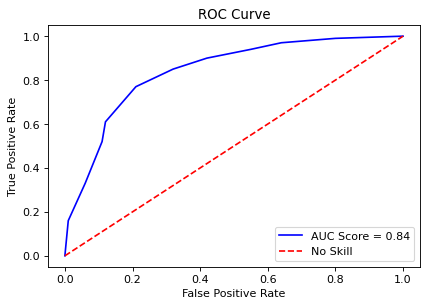

In [54]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred_rfc),'\n')
print("\n","ROC Curve")
rf_prob=rfc.predict_proba(x_test)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresh))
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red',label='No Skill')
plt.legend()

# Support Vector Classifier with oversampling

In [55]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
sv = SVC(kernel='rbf',
           gamma='auto',probability=True,C=1.0)
#sv=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)
sv.fit(x_train,y_train)
#cv_scores = cross_val_score(sv, x_train, y_train, cv=10)
#print("CV average score: %.2f" % cv_scores.mean())
y_pred_sv = sv.predict(x_test)
print('test accuracy : ', accuracy_score(y_pred_sv,y_test))
print('train accuracy:',sv.score(x_train,y_train))

test accuracy :  0.73
train accuracy: 0.81625


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
cm3 = confusion_matrix(y_test,sv.predict(x_test))
cm3

array([[65, 35],
       [19, 81]], dtype=int64)

In [57]:
def sens_spec(cm3):

    total_cm = sum(sum(cm3))

    accuracy_clf = (cm3[0,0] + cm3[1,1]) / total_cm

    sensitivity_clf = cm3[0,0] / (cm3[0, 0] + cm3[0, 1])

    specificity_clf = cm3[1,1] / (cm3[1, 0] + cm3[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

print(sens_spec(cm3))

('Accuracy: 0.73', 'Sensitivity: 0.65', 'Specificity: 0.81')



 Classification Report::
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       100
           1       0.70      0.81      0.75       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200
 


 ROC Curve
True Positive Rate - [0.   0.01 0.08 0.08 0.1  0.1  0.21 0.21 0.33 0.33 0.36 0.36 0.42 0.42
 0.45 0.45 0.52 0.52 0.53 0.53 0.55 0.55 0.56 0.56 0.59 0.59 0.6  0.6
 0.63 0.63 0.64 0.64 0.68 0.68 0.71 0.71 0.72 0.72 0.74 0.74 0.75 0.75
 0.78 0.79 0.79 0.8  0.8  0.81 0.81 0.83 0.83 0.84 0.84 0.85 0.85 0.86
 0.86 0.89 0.89 0.9  0.9  0.93 0.93 0.96 0.96 0.97 0.97 0.98 0.98 0.99
 0.99 1.   1.  ], False Positive Rate - [0.   0.   0.   0.01 0.01 0.02 0.02 0.04 0.04 0.05 0.05 0.06 0.06 0.08
 0.08 0.09 0.09 0.1  0.1  0.11 0.11 0.13 0.13 0.14 0.14 0.15 0.15 0.16
 0.16 0.17 0.17 0.2  0.2  0.21 0.21 0.22 0.22 0.23 0.23 0.27 0.27 0.29
 0.29

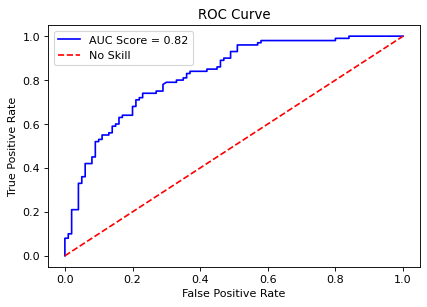

In [58]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred_sv),'\n')
print("\n","ROC Curve")
svc_prob_linear=sv.predict_proba(x_test)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresh))
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red',label='No Skill')
plt.legend()

# KNeighbors Classifier

In [59]:
kn = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
kn.fit(x_train,y_train)
y_pred_kn = kn.predict(x_test)
print('test accuracy : ', accuracy_score(y_pred_kn,y_test))
print('train accuracy:',kn.score(x_train,y_train))

test accuracy :  0.715
train accuracy: 0.84875


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
cm4 = confusion_matrix(y_test,kn.predict(x_test))
cm4

array([[59, 41],
       [16, 84]], dtype=int64)

In [62]:
def sens_spec(cm4):

    total_cm = sum(sum(cm4))

    accuracy_clf = (cm4[0,0] + cm4[1,1]) / total_cm

    sensitivity_clf = cm4[0,0] / (cm4[0, 0] + cm4[0, 1])

    specificity_clf = cm4[1,1] / (cm4[1, 0] + cm4[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

print(sens_spec(cm4))

('Accuracy: 0.72', 'Sensitivity: 0.59', 'Specificity: 0.84')



 Classification Report::
              precision    recall  f1-score   support

           0       0.79      0.59      0.67       100
           1       0.67      0.84      0.75       100

    accuracy                           0.71       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.71      0.71       200
 


 ROC Curve
True Positive Rate - [0.   0.23 0.44 0.68 0.84 0.96 1.   1.  ], False Positive Rate - [0.   0.02 0.12 0.25 0.41 0.5  0.7  1.  ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.14285714 0.        ]


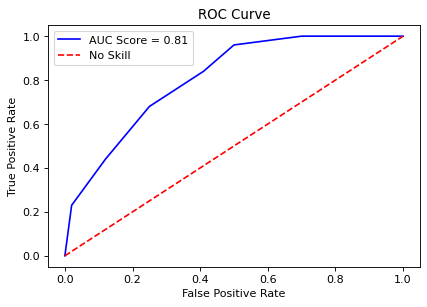

In [63]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred_kn),'\n')
print("\n","ROC Curve")
knn_prob=kn.predict_proba(x_test) ## predict probabilities
knn_prob1=knn_prob[:,1] # # keep probabilities for the positive outcome only
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1) # calculates roc curve(The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresh))
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red',label='No Skill')
plt.legend()

After comparing Logistic Regression, Decision Tree Classifier,Random Forest Classifier, Support Vector models with the results from KNN algorithm, my conclusion is Random Forest CLassifier performed better than all the other models with highest accuracy =0.76, sensitivity=0.68, specificity=0.85 and AUC=0.84, whereas KNN has accuracy=0.715, sensitivity=0.59, specificity=0.84 and AUC=0.81. For this data, RFC is a good model at predicting positive class.

In [ ]:
Decision Threshold In Machine Learning
Difficulty Level : Medium
Last Updated : 05 Sep, 2020
What is Decision Threshold ?
sklearn does not let us set the decision threshold directly, but it gives us the access to decision scores ( Decision function o/p ) that is used to make the prediction. We can select the best score from decision function output and set it as Decision Threshold value and consider all those Decision score values which are less than this Decision Threshold as a negative class ( 0 ) and all those decision score values that are greater than this Decision Threshold value as a positive class ( 1 ).

Using Precision-Recall curve for various Decision Threshold values, we can select the best value for Decision Threshold such that it gives High Precision ( Without affection Recall much ) or High Recall ( Without affecting Precision much ) based on whether our project is precision-oriented or recall-oriented respectively.

The main purpose of doing this is to get a high precision ML model, or high recall ML model, based on whether our ML project is precision-oriented or recall-oriented respectively.

Code: Python code to build a high Precision ML model


# Import required modules.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
  
# Get the data.
data_set = datasets.load_breast_cancer()
  
# Get the data into an array form.
x = data_set.data        # Input feature x.
y = data_set.target      # Input target variable y.
  
# Get the names of the features.
feature_list = data_set.feature_names
  
# Convert the data into pandas data frame.
data_frame = pd.DataFrame(x, columns = feature_list)
  
# To insert an output column in data_frame.
data_frame.insert(30, 'Outcome', y)       # Run this line only once for every new training.
  
# Data Frame.
data_frame.head(7)
Output:




Code: Train the model


# Train Test Split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  
# Create Classifier Object.
clf = SVC()
clf.fit(x_train, y_train)
  
# Use decision_function method.
decision_function = clf.decision_function(x_test)
Actual Scores obtained:


# Actual obtained results without any manual setting of Decision Threshold.
predict_actual = clf.predict(x_test)       # Predict using classifier.
accuracy_actual = clf.score(x_test, y_test)
classification_report_actual = classification_report(y_test, predict_actual)
print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')
Output:


In the above classification report, we can see that our model precision value for (1) is 0.92 and recall value for (1) is 1.00. Since our goal in this article is to build a High-Precision ML model in predicting (1) without affecting Recall much, we need to manually select the best value of Decision Threshold value form the below Precision-Recall curve, so that we could increase the precision of this model.

Code:


# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_test, decision_function)
  
# Plot the output.
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')
Output:



Here in the above plot, we can see that if we want high precision value, then we need to increase the value of decision 
threshold     ( x-axis ), but which would decrease the value of recall ( which is not favourable). so we need to choose 
that value of Decision Threshold which would increase Precision but not much decrease in Recall. One such value form the
above plot is around 0.6 Decision Threshold.

Code:


# Implementing main logic.
  
# Based on analysis of the Precision-Recall curve.
# Let Decision Threshold value be around 0.6... to get high Precision without affecting recall much.
# Desired results.
  
# Decision Function output for x_test.
df = clf.decision_function(x_test)
  
# Set the value of decision threshold.
decision_teshold = 0.5914643767268305
  
# Desired prediction to increase precision value.
desired_predict =[]
  
# Iterate through each value of decision function output
# and if  decision score is > than Decision threshold then,
# append (1) to the empty list ( desired_prediction) else
# append (0).
for i in df:
    if i<decision_teshold:
        desired_predict.append(0)
    else:
        desired_predict.append(1)
Code: Comparison between old and new Precision Values.


# Comparison
  
# Old Precision Value
print("old precision value:", precision_score(y_test, predict_actual))
# New precision Value  
print("new precision value:", precision_score(y_test, desired_predict))
Output:

old precision value: 0.922077922077922
new precision value: 0.9714285714285714
OBSERVATIONS:

The value of Precision has increased from 0.92 to 0.97.
The Value of Recall has decreased due to Precision-Recall Trade off.